In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
426,ham,aathi..where are you dear..,NaN,NaN,NaN
4351,ham,Hows the pain dear?y r u smiling?,NaN,NaN,NaN
1466,ham,Your account has been refilled successfully by...,NaN,NaN,NaN
2520,ham,Misplaced your number and was sending texts to...,NaN,NaN,NaN
1462,spam,09066362231 URGENT! Your mobile No 07xxxxxxxxx...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
481,ham,"Yo carlos, a few friends are already asking me..."
4265,ham,The greatest test of courage on earth is to be...
3738,ham,Did you stitch his trouser
3603,ham,Hey morning what you come to ask:-) pa...
3477,ham,I can ask around but there's not a lot in term...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True) 

In [9]:
df.sample(5)

,target,text
5372,ham,"Ok., is any problem to u frm him? Wats matter?"
3835,ham,Then Ì_ come n pick me at 530 ar?
3260,ham,Yup i'm still having coffee wif my frens... My...
4651,ham,Where r e meeting tmr?
3503,ham,Will you be here for food


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
!pip install scikit-learn

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df.sample(5)

,target,text
4034,1,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...
2107,0,Hmmm ... And imagine after you've come home fr...
5042,0,O ic lol. Should play 9 doors sometime yo
1943,0,I got lousy sleep. I kept waking up every 2 ho...
1268,1,Can U get 2 phone NOW? I wanna chat 2 set up m...


In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
df.duplicated().sum()

403

In [22]:
df = df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5169, 2)

## 2. EDA

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

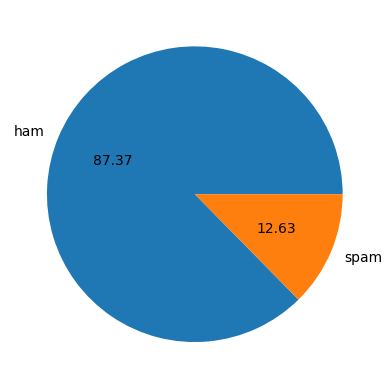

In [35]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [36]:
# Data is imbalanced, since ham is way more than spam

In [39]:
!pip install nltk

In [47]:
# Now we will find the number of characters, words and sentences in the sms
# for this, importing library nltk
import nltk

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
# fetch no. of characters
df['num_characters'] = df['text'].apply(len)

In [50]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [51]:
# fetch words
df['text'].apply(lambda x:nltk.word_tokenize(x))
# df['num_words'] = df['text'].apply(len)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\divya/nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\share\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\lib\\nltk_data'
    - 'C:\\Users\\divya\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
from nltk.tokenize import word_tokenize
print(word_tokenize("Hello world! This is a test."))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\divya/nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\share\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\lib\\nltk_data'
    - 'C:\\Users\\divya\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [54]:
pip uninstall nltk
pip install nltk

SyntaxError: invalid syntax (2639569665.py, line 1)

In [55]:
!pip uninstall -y nltk
!pip install nltk

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
from nltk.tokenize import word_tokenize
print(word_tokenize("Hello world! This is a test."))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\divya/nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\share\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\lib\\nltk_data'
    - 'C:\\Users\\divya\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [59]:
import nltk
nltk.download('punkt', download_dir='/usr/share/nltk_data')  # or any known accessible path

# Add this manually to tell nltk where to look
nltk.data.path.append('/usr/share/nltk_data')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
from nltk.tokenize import word_tokenize
print(word_tokenize("Hello world! This is a test."))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\divya/nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\share\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\lib\\nltk_data'
    - 'C:\\Users\\divya\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/share/nltk_data'
**********************************************************************


In [61]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\divya/nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\share\\nltk_data'
    - 'C:\\Users\\divya\\miniconda3\\envs\\py39\\lib\\nltk_data'
    - 'C:\\Users\\divya\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/share/nltk_data'
**********************************************************************


In [63]:
from nltk.tokenize import word_tokenize
print(word_tokenize("Hello world! This is a test."))


['Hello', 'world', '!', 'This', 'is', 'a', 'test', '.']


In [66]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [67]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [68]:
#fetch sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [70]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [81]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/294.9 kB 512.0 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 512.0 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 700.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 700.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 700.2 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 729.9 kB/s eta 0:00:00


<Axes: xlabel='num_characters', ylabel='Count'>

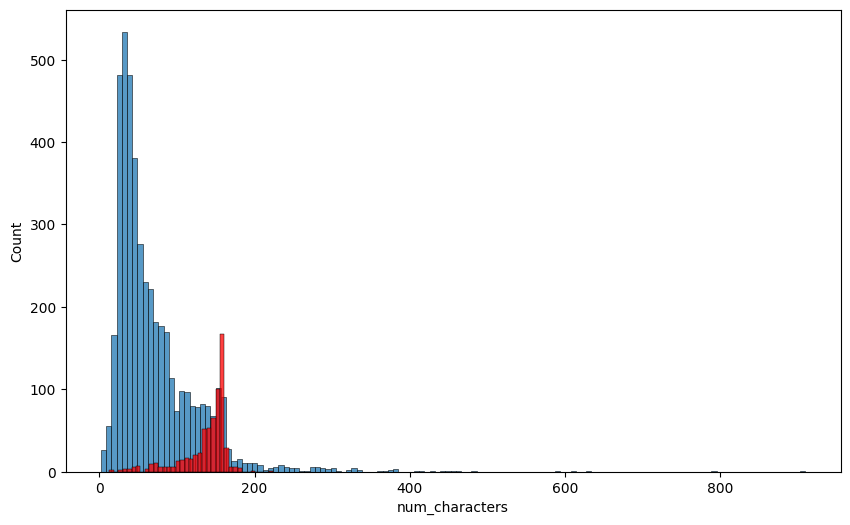

In [83]:
import seaborn as sns
plt.figure(figsize =(10,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

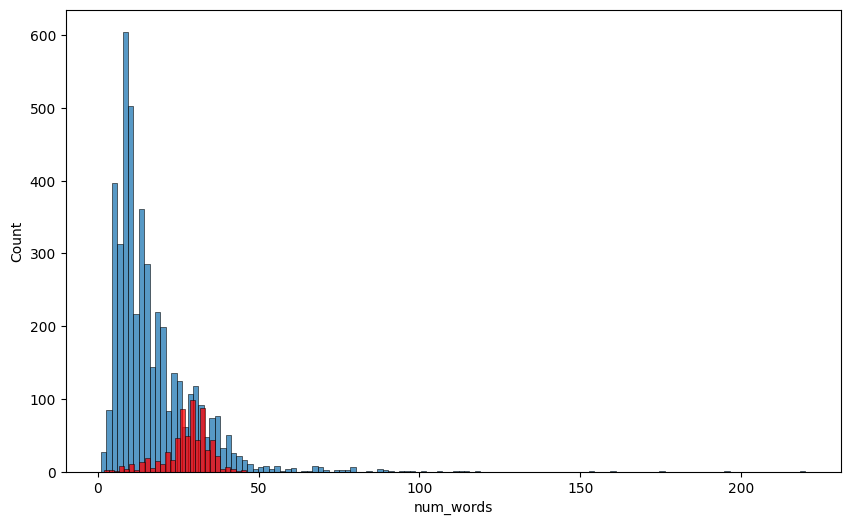

In [84]:
plt.figure(figsize =(10,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

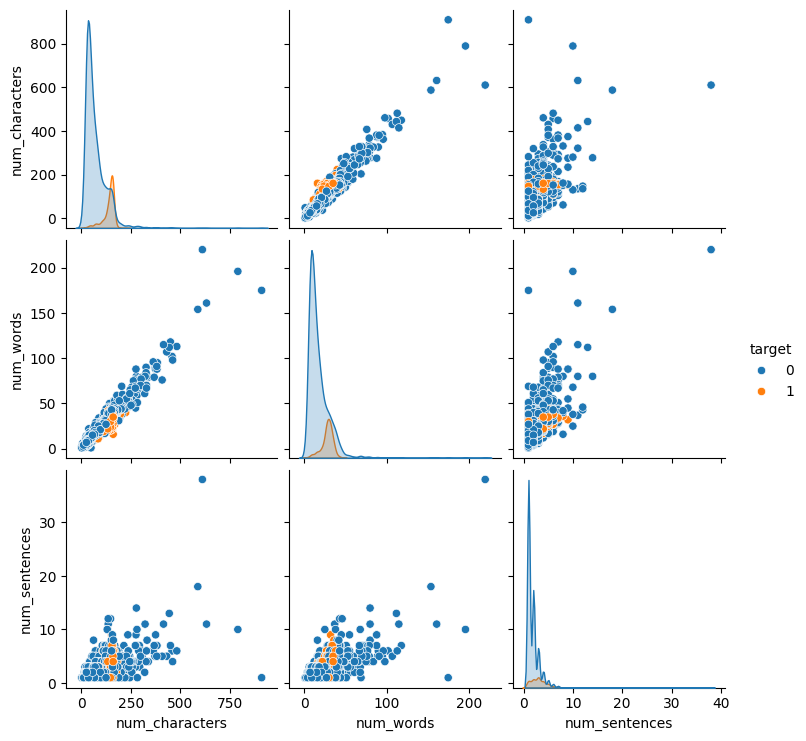

In [85]:
sns.pairplot(df,hue='target')

<Axes: >

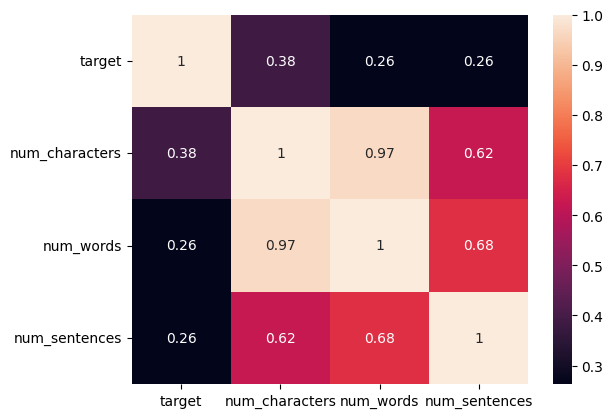

In [90]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3. Data Preprocessing
- Lower Case
- Tokenisation
- Removing special characters
- removing stop words and punctuation
- stemming

In [95]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [94]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [105]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)      

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [106]:
# nltk.download('PorterStemmer')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [107]:
transform_text('I loved the YT Lectures on Machine Learning, How about you?')

'love yt lectur machin learn'

In [108]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [109]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [112]:
df['transformed_text'] = df['text'].apply(transform_text)

In [113]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [114]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [115]:
!pip install wordcloud


   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   -- ------------------------------------- 20.5/300.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.4 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.4 kB 409.6 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.4 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 300.4/300.4 kB 1.2 MB/s eta 0:00:00


In [116]:
from wordcloud import WordCloud

In [117]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=))

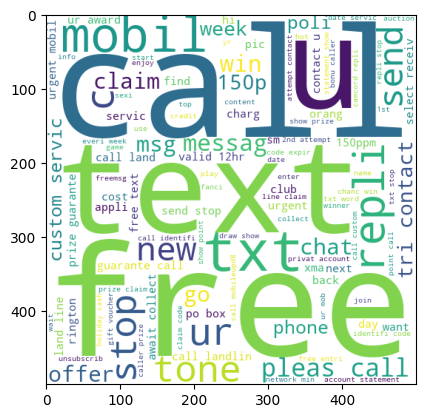

In [118]:
plt.imshow(spam_wc)

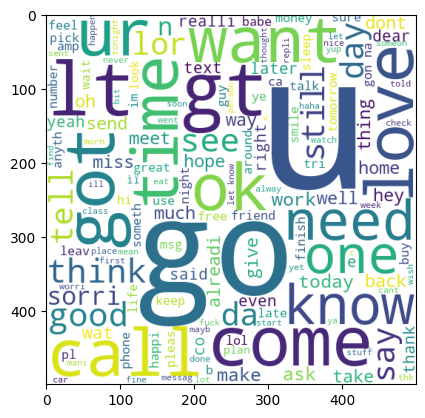

In [120]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [121]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [122]:
len(spam_corpus)

9939

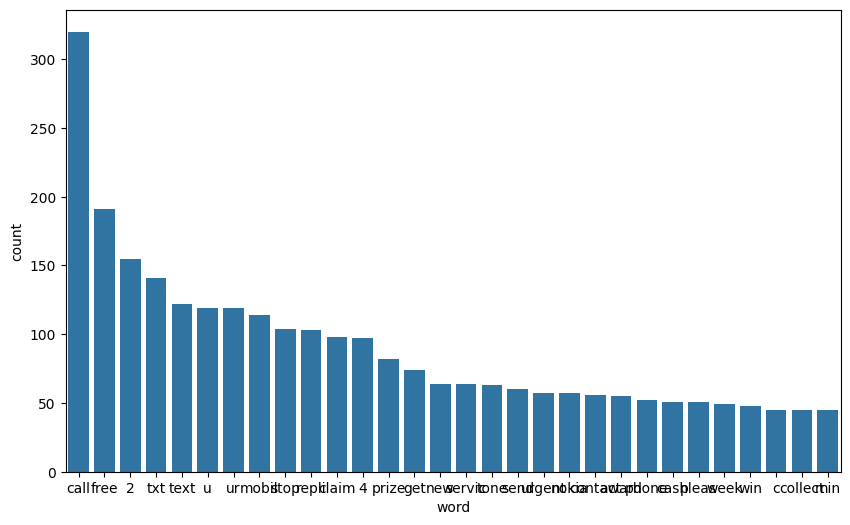

In [135]:
from collections import Counter
# Create a DataFrame from the most common words
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=top_words)
plt.show()

In [136]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

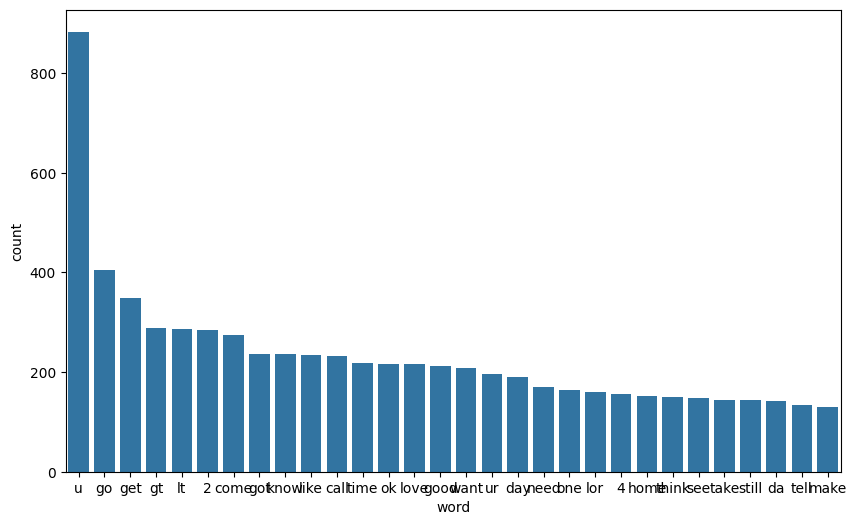

In [137]:
from collections import Counter
# Create a DataFrame from the most common words
top_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=top_words)
plt.show()

## 4. Model Building

In [170]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [171]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X = scaler.fit_transform(X)

In [180]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [182]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [183]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [184]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [185]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [178]:
# Using CountVectorizer, Bernoulli gave the best precision score 
# Using TfidfVectorizer, Multinomial gave the best precision score 
# Precision is more significant here rather than accuracy since data is imbalanced
# So we will choose Multinomial Naive Bayes, since it gave more precision than BernoulliNB
# Hence using Tfidf

In [188]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))